In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anderson\Desktop\movies.csv")
df

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0,NaN,NaN
1790,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0,NaN,NaN
1791,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0,NaN,NaN
1792,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0,NaN,NaN


In [3]:
#drop a few columns that are not inmportant for our study
columns_to_drop = ['imdb', 'period code','decade code']
df = df.drop(columns=columns_to_drop)
df

,year,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$
0,2013,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0
1,2012,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0
2,2013,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0
3,2013,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0
4,2013,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0
1790,1971,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0
1791,1971,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0
1792,1971,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0


In [4]:
df

,year,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$
0,2013,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0
1,2012,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0
2,2013,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0
3,2013,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0
4,2013,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0
1790,1971,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0
1791,1971,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0
1792,1971,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0


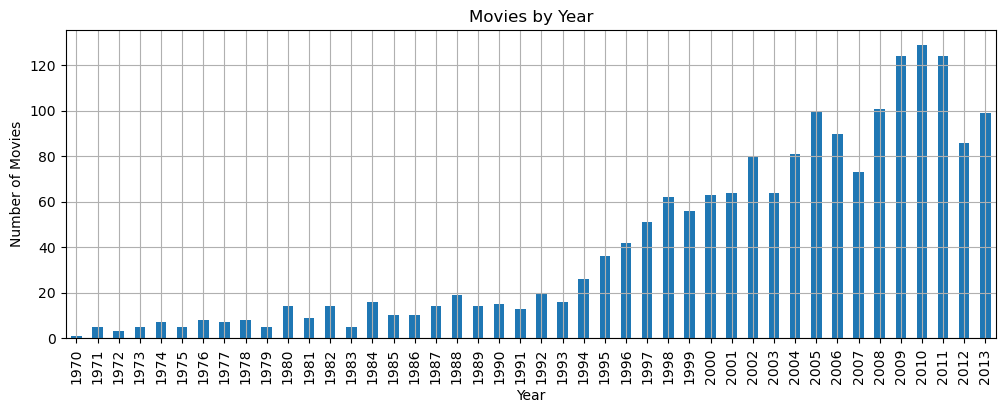

In [5]:
#lets have a look on the movies by year of launch, so we can see our sample
plt.figure(figsize=(12, 4))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


In [6]:
#this is to take a look on the values of the test column
df.test.value_counts()

test
ok                  696
notalk              379
notalk-disagree     135
men                 125
ok-disagree         107
nowomen              88
dubious              81
men-disagree         69
dubious-disagree     61
nowomen-disagree     53
Name: count, dtype: int64

In [7]:
df_70s = df[(df['year'] >= 1970) & (df['year'] <= 1979)]

In [8]:
print(df_70s['year'].unique())

[1979 1978 1977 1976 1975 1974 1973 1972 1971 1970]


In [9]:
result_counts = df_70s.pivot_table(index='year', columns='binary', aggfunc='size', fill_value=0)
print(result_counts)


binary  FAIL  PASS
year              
1970       0     1
1971       5     0
1972       2     1
1973       4     1
1974       5     2
1975       5     0
1976       5     3
1977       5     2
1978       6     2
1979       3     2


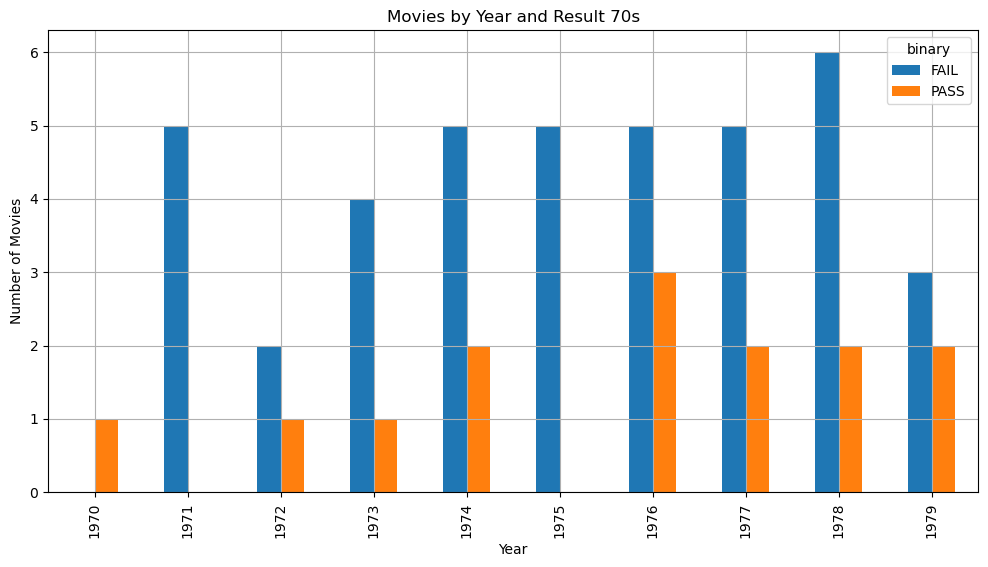

In [10]:
result_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Movies by Year and Result 70s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

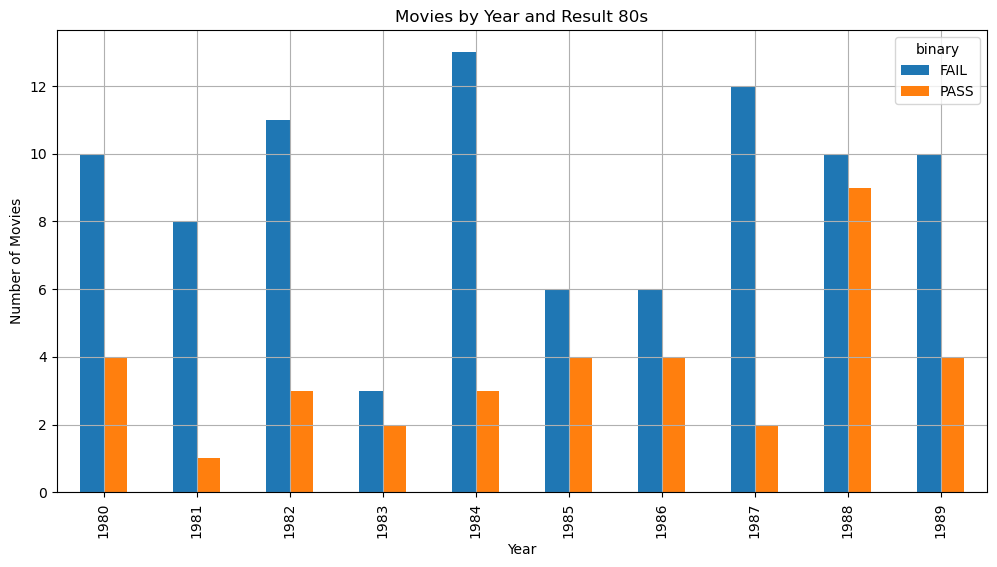

In [11]:
df_80s = df[(df['year'] >= 1980) & (df['year'] <= 1989)]
result_counts = df_80s.pivot_table(index='year', columns='binary', aggfunc='size', fill_value=0)
result_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Movies by Year and Result 80s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)


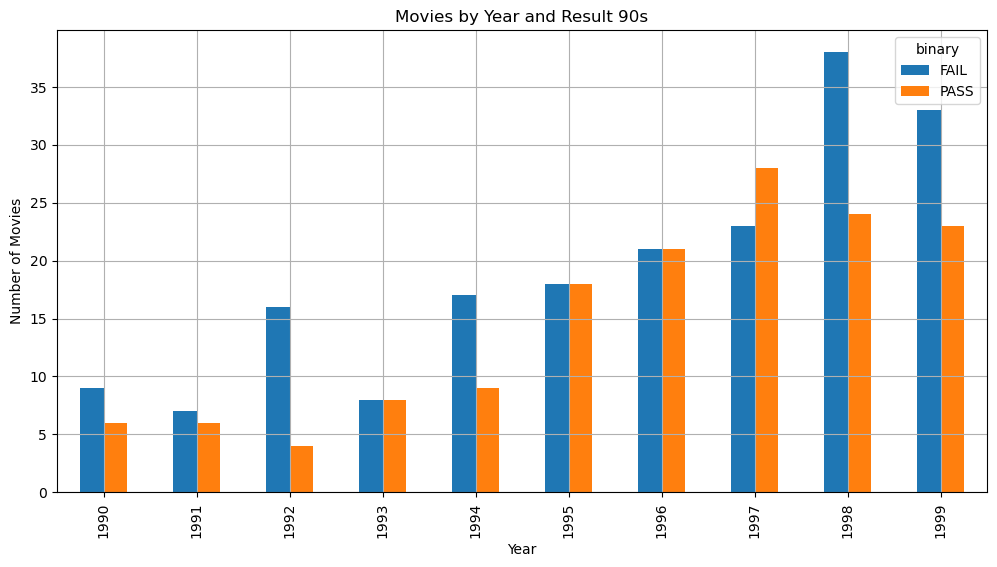

In [12]:
df_90s = df[(df['year'] >= 1990) & (df['year'] <= 1999)]
result_counts = df_90s.pivot_table(index='year', columns='binary', aggfunc='size', fill_value=0)
result_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Movies by Year and Result 90s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

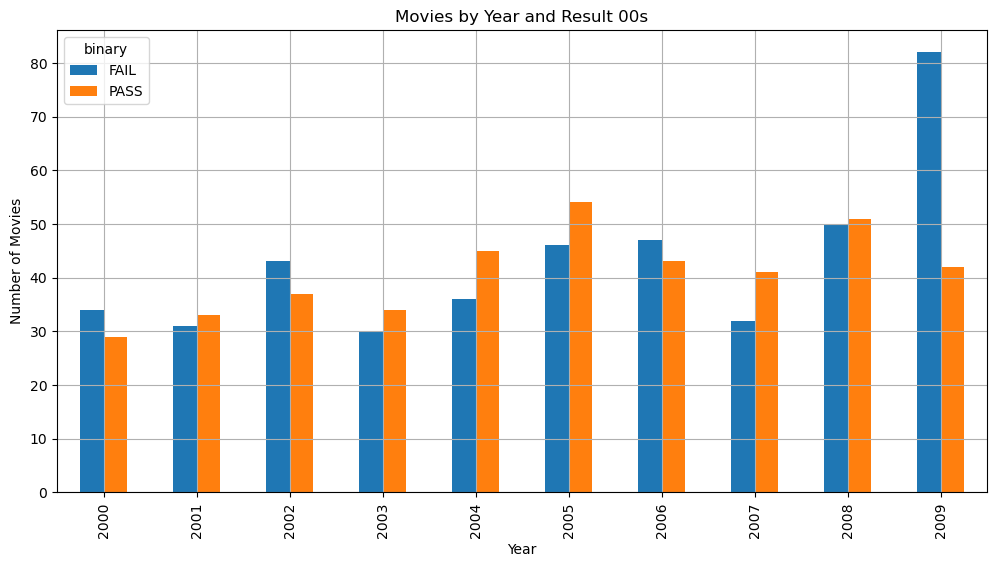

In [13]:
df_00s = df[(df['year'] >= 2000) & (df['year'] <= 2009)]
result_counts = df_00s.pivot_table(index='year', columns='binary', aggfunc='size', fill_value=0)
result_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Movies by Year and Result 00s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

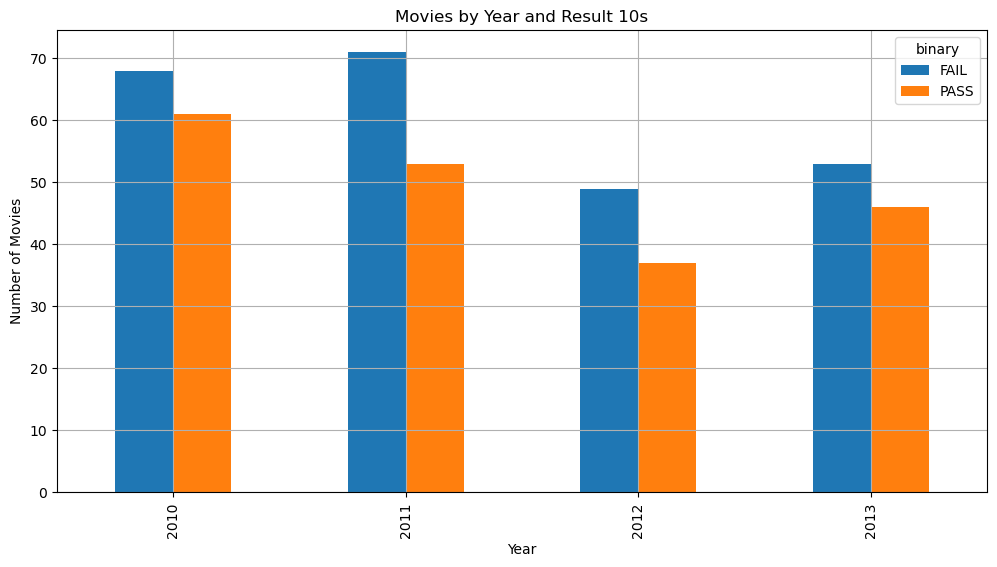

In [14]:
df_10s = df[(df['year'] >= 2010) & (df['year'] <= 2020)]
result_counts = df_10s.pivot_table(index='year', columns='binary', aggfunc='size', fill_value=0)
result_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Movies by Year and Result 10s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)

In [15]:
df.to_excel('Mid Bootcamp Project DF.xlsx', index=False)